In [7]:
import pandas as pd
import polars as pl
import missingno as mo
# import streamlit as st

In [8]:
df = pl.read_csv('StudentsPerformance.csv', separator=';')

In [9]:
df

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,i64,i64,i64
"""female""","""group B""","""bachelor's deg…","""standard""","""none""",72,72,74
"""female""","""group C""","""some college""","""standard""","""completed""",69,90,88
"""female""","""group B""","""master's degre…","""standard""","""none""",90,95,93
"""male""","""group A""","""associate's de…","""free/reduced""","""none""",47,57,44
"""male""","""group C""","""some college""","""standard""","""none""",76,78,75
"""female""","""group B""","""associate's de…","""standard""","""none""",71,83,78
"""female""","""group B""","""some college""","""standard""","""completed""",88,95,92
"""male""","""group B""","""some college""","""free/reduced""","""none""",40,43,39
"""male""","""group D""","""high school""","""free/reduced""","""completed""",64,64,67


In [10]:
df.select(
    pl.col('*'),
    pl.when(pl.col('math score') >= 70).then('Aprovado').otherwise('Reprovado').alias('test'),

)

C:\Users\corpc34475\AppData\Local\Temp\ipykernel_14096\2593611998.py:3: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('Aprovado')`
  pl.when(pl.col('math score') >= 70).then('Aprovado').otherwise('Reprovado').alias('test'),
C:\Users\corpc34475\AppData\Local\Temp\ipykernel_14096\2593611998.py:3: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('Reprovado')`
  pl.when(pl.col('math score') >= 70).then('Aprovado').otherwise('Reprovado').alias('test'),


gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,test
str,str,str,str,str,i64,i64,i64,str
"""female""","""group B""","""bachelor's deg…","""standard""","""none""",72,72,74,"""Aprovado"""
"""female""","""group C""","""some college""","""standard""","""completed""",69,90,88,"""Reprovado"""
"""female""","""group B""","""master's degre…","""standard""","""none""",90,95,93,"""Aprovado"""
"""male""","""group A""","""associate's de…","""free/reduced""","""none""",47,57,44,"""Reprovado"""
"""male""","""group C""","""some college""","""standard""","""none""",76,78,75,"""Aprovado"""
"""female""","""group B""","""associate's de…","""standard""","""none""",71,83,78,"""Aprovado"""
"""female""","""group B""","""some college""","""standard""","""completed""",88,95,92,"""Aprovado"""
"""male""","""group B""","""some college""","""free/reduced""","""none""",40,43,39,"""Reprovado"""
"""male""","""group D""","""high school""","""free/reduced""","""completed""",64,64,67,"""Reprovado"""


In [11]:
type(df)

polars.dataframe.frame.DataFrame

In [12]:
df = df.to_pandas()
type(df)

pandas.core.frame.DataFrame

In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

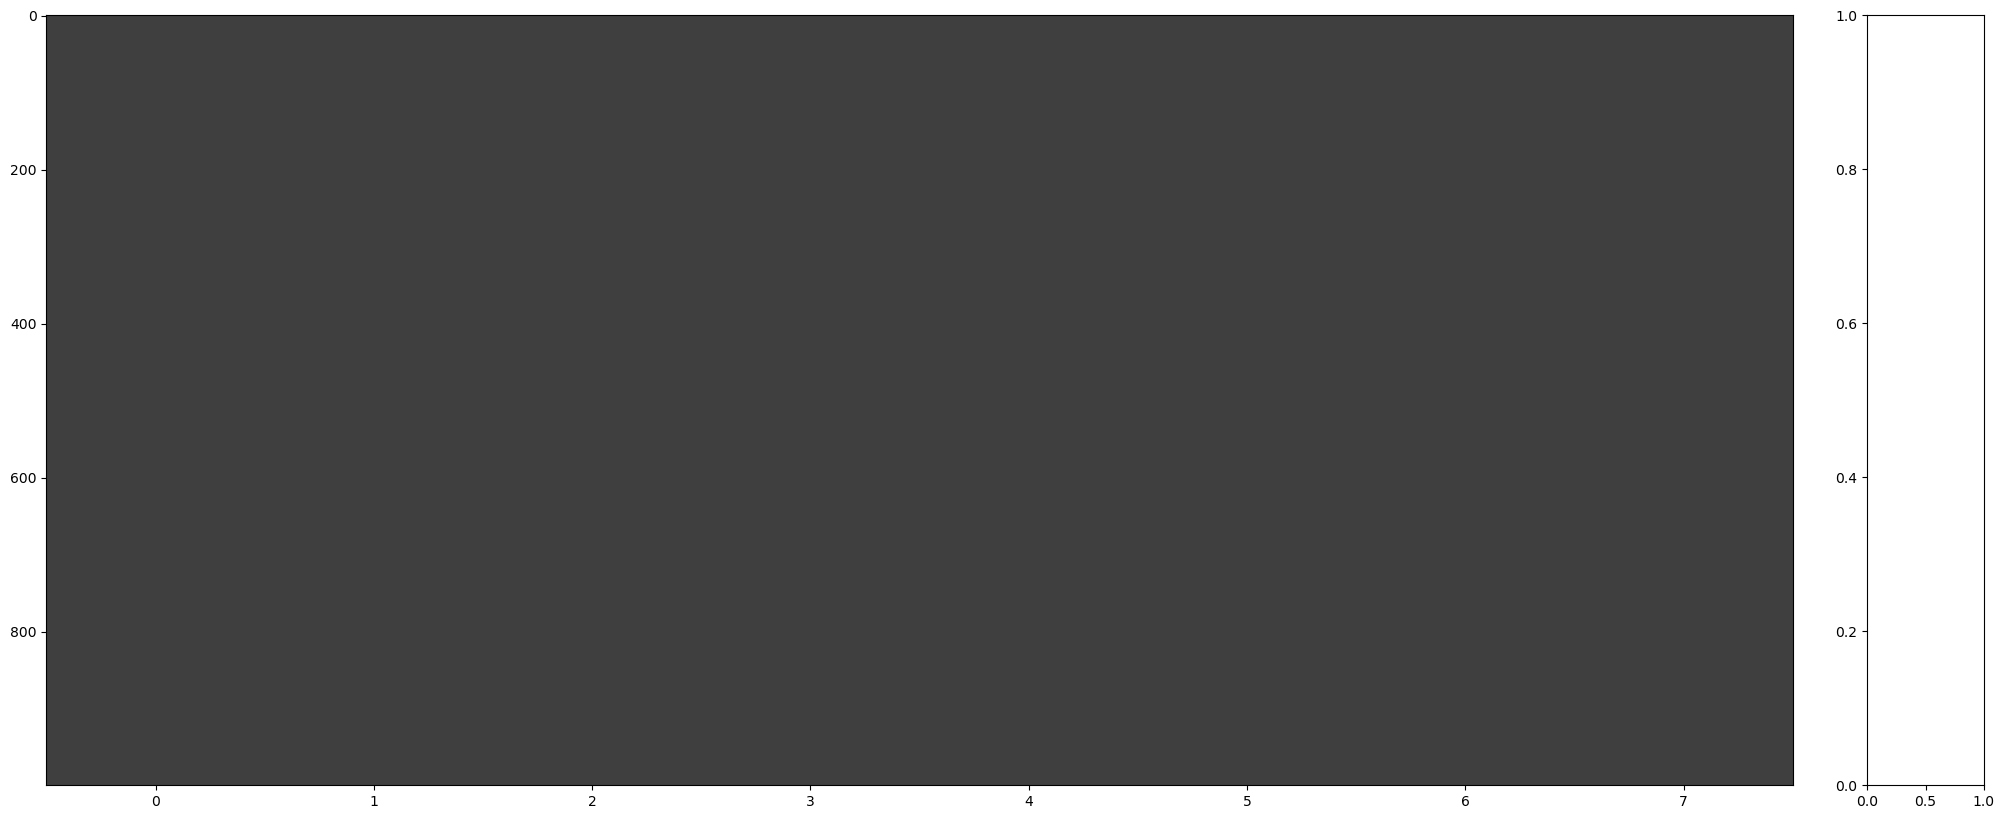

In [13]:
mo.matrix(df)